# **DAT6501:** AI and Statistical Data Analysis 
## **Machine Learning Project**
### **Name:** Maxym Habarov
### **Student ID:** 220512321

This project focuses on credit score identification via a Decision Tree (DT) Classifier from scikit-learn

The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=test.csv)

### **Hypothesis**

If an ML model is trained on a comprehensive dataset, featuring key financial indicators such as: annual income, number of delayed payments and outstanding debt, etc.; then it will be able to accurately identify the credit scoring of future individuals and assign them to the categories of poor, standard, and good with high levels of precision and recall.

### **Data Selection**

The dataset selected was one that contains financial indicators for individuals that can then be used to determine credit scores. This applies to my industry of financial services as credit scores are vital for assessing the risk of lending to individuals, and lending is the one of the main ways that financial services corporations generate profit. For this reason, using an ML model to calculate credit scores is an extremely useful project idea for the industry and could likely be used across a variety of departments and sections of the financial services industry. 

Since there are many compliance and regulatory issues with publishing and using individuals' data in the public domain, the dataset used in this project is a simulated one created by kagglehub user `Rohan Paris`; however, due to the nature of the model, the dataset can just be replaced with a live one if the model were ever used in a production context.

### **Model Selection**

A DT will be used for this project, a which can be defined as a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes (IBM, 2024). As mentioned above, the specific model that will be used for this project is a DT Classifier, which will use the mentioned methodology to predict credit score categories for indiviuals based off of financial data that is assigned to them.

A DT is a suitable choice for credit score classification for a number of reasons:
1. **Handling Non-Linear Relationships:** DTs can detect non-linear relationships between the target variable and related features. Credit scoring usually involves complex interactions between a variety of financial variables, these interactions can be effectively modelled by DTs.

2. **Feature Importance:** A strong selling point of DTs is the insight that they provide into the importance of individual features and what they contribute to the overrall model.

3. **No Need for Feature Scaling:** Unlike other ML algorithms, DTs do not require feature scaling, simplifying the steps for preprocessing and reducing the risk of introducing errors to the dataset during preparation.

4. **Handling Missing Values:** DTs can handle missing dataset values by using surrogate splits or by assigning the most frequent value of the feature, making the model robust to real-world scenarios.

5. **Efficiency:** DTs are, in relative terms, fast to train and make predictions; this makes them intuitive to work with the large datasets that are often encountered in credit scoring.

In [2]:
import kagglehub as kh
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree



c:\Users\maxym\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kh.dataset_download('parisrohan/credit-score-classification')
train_df = pd.read_csv(os.path.join(path, 'train.csv'))
test_fdf = pd.read_csv(os.path.join(path, 'test.csv'))

C:\Users\maxym\AppData\Local\Temp\ipykernel_26900\2902726373.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(os.path.join(path, 'train.csv'))


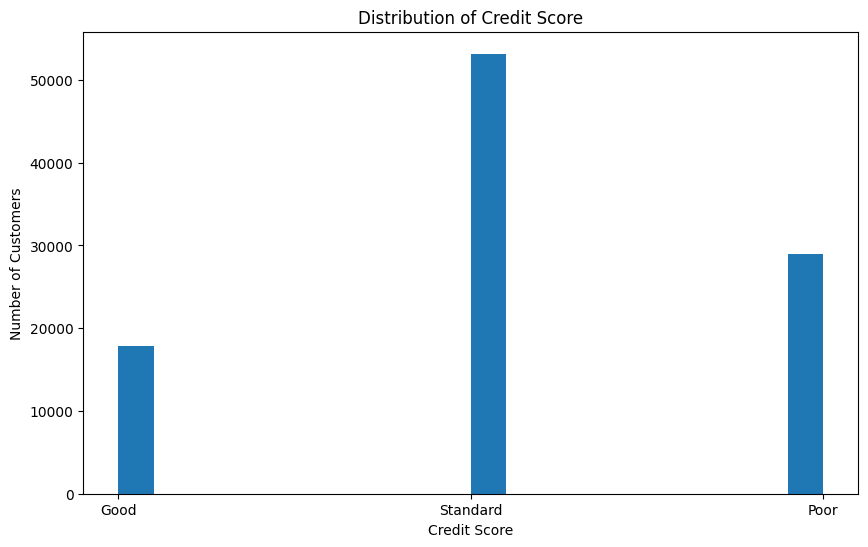

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['Credit_Score'], bins=20)
plt.title('Distribution of Credit Score')
plt.ylabel('Number of Customers')
plt.xlabel('Credit Score')
plt.show()

In [5]:
train_df.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Type_of_Loan'], axis=1, inplace=True)
train_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,NaN,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value


def filter_(value: str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value

In [7]:
train_df['Amount_invested_monthly'] = train_df['Amount_invested_monthly'].replace('__10000__', np.nan).astype('float').round(3).replace('NaN', np.nan, inplace=True)
train_df['Annual_Income'] = train_df['Annual_Income'].apply(filter_col).astype(float)
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace({
    "Standard": 1,
    "Bad": 2,
    "Good": 3,
    "-": np.nan,
    "_": np.nan
}, inplace=True)
train_df['Credit_Utilization_Ratio'] = train_df['Credit_Utilization_Ratio'].round(2)
train_df['Delay_from_due_date'] = train_df['Delay_from_due_date'].clip(lower=0)
train_df['Monthly_Balance'] = train_df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan).astype('float')
train_df['Num_Bank_Accounts'] = train_df['Num_Bank_Accounts'].replace(-1, 0, inplace=True)
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].apply(filter_).replace('NaN', np.nan).astype('float').apply(filter_)
train_df['Occupation'] = train_df['Occupation'].replace('_______', 'Unemployed').astype('object')
train_df['Outstanding_Debt'] = train_df['Outstanding_Debt'].apply(filter_col).astype(float)
train_df['Total_EMI_per_month'] = train_df['Total_EMI_per_month'].astype('float').round(3)

C:\Users\maxym\AppData\Local\Temp\ipykernel_26900\435787085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Credit_Mix'] = train_df['Credit_Mix'].replace({
C:\Users\maxym\AppData\Local\Temp\ipykernel_26900\435787085.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Credit_M

In [8]:
train_df["Age"] = train_df["Age"].apply(filter_col).astype(int)
train_df["Age"].value_counts()
train_df.loc[(train_df["Age"] > 90) | (train_df["Age"] < 10), "Age"] = np.nan

In [9]:
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].replace('_', np.nan)
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].astype("float")
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(train_df["Changed_Credit_Limit"].mean())
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].round(3)

In [10]:
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].replace('!@9#%8', np.nan)
train_df['Payment_Behaviour'] = train_df["Payment_Behaviour"].replace("Low_spent_Small_value_payments", 1, inplace=True)
train_df['Payment_Behaviour'] = train_df["Payment_Behaviour"].replace("Low_spent_Medium_value_payments", 2, inplace=True)
train_df['Payment_Behaviour'] = train_df["Payment_Behaviour"].replace("Low_spent_Large_value_payments", 3, inplace=True)
train_df['Payment_Behaviour'] = train_df["Payment_Behaviour"].replace("High_spent_Small_value_payments", 4, inplace=True)
train_df['Payment_Behaviour'] = train_df["Payment_Behaviour"].replace("High_spent_Medium_value_payments", 5, inplace=True)
train_df['Payment_Behaviour'] = train_df["Payment_Behaviour"].replace("High_spent_Large_value_payments", 6, inplace=True)

C:\Users\maxym\AppData\Local\Temp\ipykernel_26900\641382297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Payment_Behaviour'] = train_df["Payment_Behaviour"].replace("Low_spent_Small_value_payments", 1, inplace=True)
C:\Users\maxym\AppData\Local\Temp\ipykernel_26900\641382297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

In [11]:
years = []
months = []
for i in train_df["Credit_History_Age"]:
    if pd.isna(i):
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = i.lower().split()
        years.append(int(new_str[0]))
        months.append(int(new_str[new_str.index('and') + 1]))

train_df['Credit_Age_Years'] = pd.Series(years)
train_df['Credit_Age_Months'] = pd.Series(months)
train_df.drop('Credit_History_Age', axis=1, inplace=True)

In [12]:
train_df["Num_of_Loan"] = train_df["Num_of_Loan"].apply(filter_col)
train_df["Num_of_Loan"] = train_df["Num_of_Loan"].astype(int)
train_df.loc[train_df["Num_of_Loan"] > 100, "Num_of_Loan"] = np.nan

In [13]:
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace("Standard",1)
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace("Bad",2)
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace("Good",3)
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace("-",np.nan)

credit_mix_data = train_df['Credit_Mix'].values.reshape(-1, 1)

In [14]:
num_data = []
obj_data = []

for i in train_df.columns:
    if train_df.dtypes[i] != 'object':
        num_data.append(i)
    else:
        obj_data.append(i)

In [15]:
train_df["Payment_Behaviour"].ffill(inplace=True)
train_df['Occupation'].ffill(inplace=True)

C:\Users\maxym\AppData\Local\Temp\ipykernel_26900\2996543213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Payment_Behaviour"].ffill(inplace=True)
C:\Users\maxym\AppData\Local\Temp\ipykernel_26900\2996543213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [16]:
columns = ['Credit_Score', 'Occupation', 'Payment_of_Min_Amount']
for i in columns: train_df[i] = LabelEncoder().fit_transform(train_df[i])

In [17]:
y = train_df['Credit_Score']
train_df.drop(["Credit_Score"], axis=1, inplace=True)
X = train_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

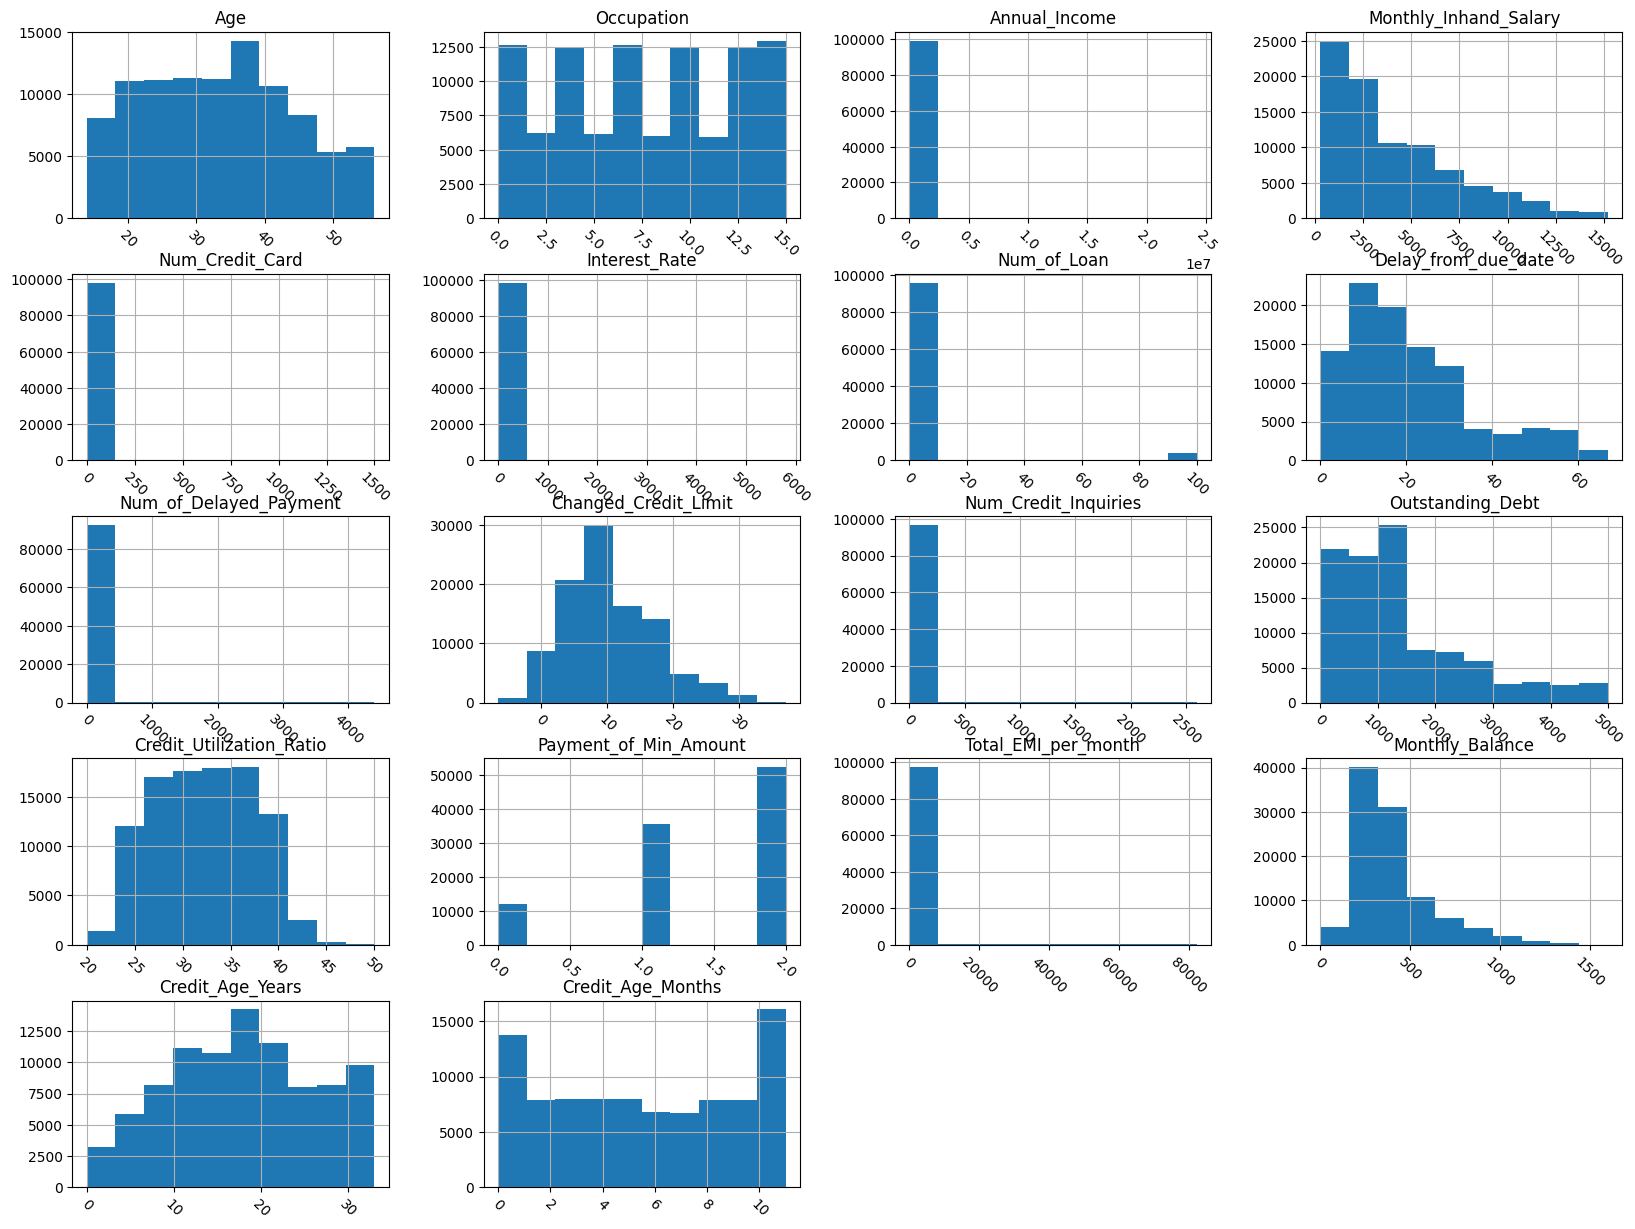

In [18]:
train_df.hist(figsize=(20, 15), xrot=-45)
plt.show()

In [19]:
model = DecisionTreeClassifier(random_state=42)
model.fit(train_df, y)
y_pred = model.predict(train_df)

In [20]:
def print_metrics(y, y_pred):
    print(f'Accuracy: {accuracy_score(y, y_pred)}')
    print(f'Precision: {precision_score(y, y_pred, average='weighted')}')
    print(f'Recall: {recall_score(y, y_pred, average="weighted")}')
    print(f'F1 : {f1_score(y, y_pred, average="weighted")}')
    print(f'Confusion Matrix: \n{confusion_matrix(y, y_pred)}')

print_metrics(y, y_pred)

Accuracy: 0.99749
Precision: 0.9974901509873295
Recall: 0.99749
F1 : 0.997490056648044
Confusion Matrix: 
[[17773     5    50]
 [   12 28925    61]
 [   52    71 53051]]


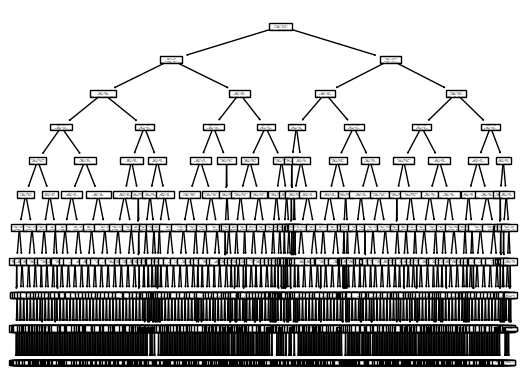

In [21]:
model_2 = DecisionTreeClassifier(random_state=42, max_depth=10)
model_2.fit(train_df, y)
y_pred_2 = model_2.predict(train_df)

plot_tree(model_2)
plt.show()

In [22]:
print_metrics(y, y_pred_2)

Accuracy: 0.71453
Precision: 0.7175397637564431
Recall: 0.71453
F1 : 0.7150320822331439
Confusion Matrix: 
[[11131   249  6448]
 [ 1524 19624  7850]
 [ 6594  5882 40698]]


In [23]:
param_grid = {
	'max_depth': [10, 15, 20],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4],
	'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search.fit(train_df, y)

c:\Users\maxym\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\maxym\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maxym\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maxym\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self.

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='f1')

In [24]:
final_model = random_search.best_estimator_
y_pred_3 = final_model.predict(train_df)

Below is the final set of metrics:

In [25]:
print_metrics(y, y_pred_3)

Accuracy: 0.88782
Precision: 0.89008631961747
Recall: 0.88782
F1 : 0.8884823114664849
Confusion Matrix: 
[[15532   148  2148]
 [  796 26040  2162]
 [ 3319  2645 47210]]


## Feature Importance

Below is the code for a bar chart that represents the importance of features in descending order.

In [26]:
features = final_model.feature_importances_
feature_name = list(train_df.columns)
sorted_indices = np.argsort(features)[::-1]

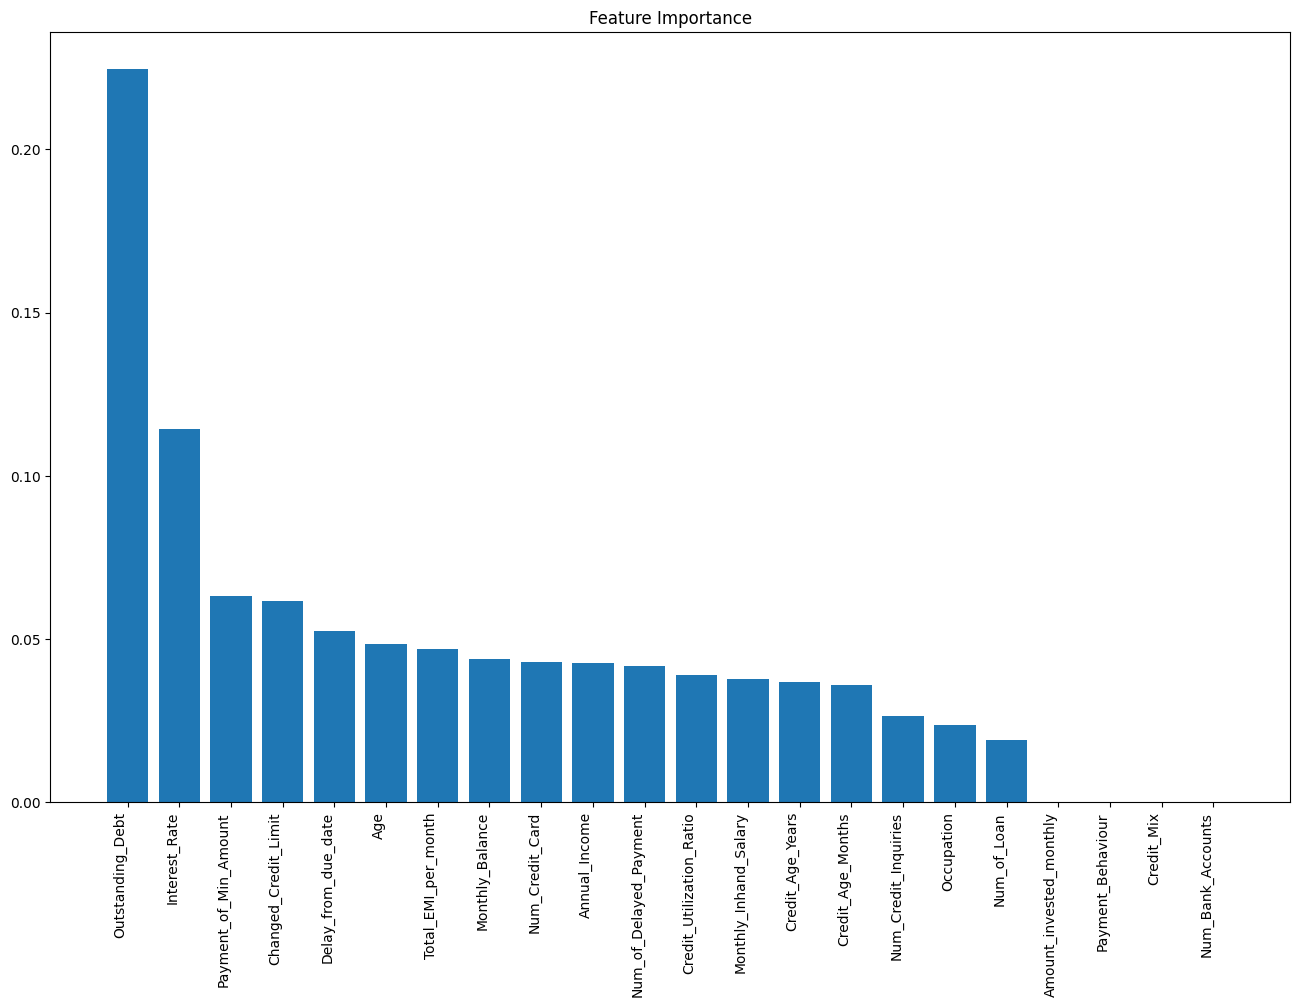

In [27]:
plt.figure(figsize=(16, 10))
plt.bar(range(len(features)), features[sorted_indices], align='center')
plt.xticks(range(len(features)), np.array(feature_name)[sorted_indices], rotation=90, ha='right')
plt.title("Feature Importance")
plt.show()

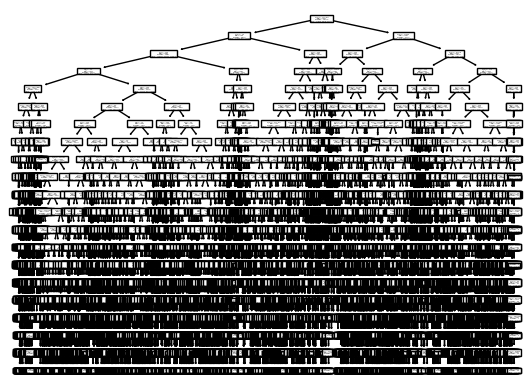

In [28]:
final_model.max_depth = 6
plot_tree(final_model)
plt.show()

## **List of References**

IBM. (2024, August 15). What is a decision tree? https://www.ibm.com/topics/decision-trees 